In [1]:
##### %pip install wandb -q
# !conda init
import wandb

train
242078,
106005,
120003,
146074,
147080,
2018,
208078,
365072,
48025,
test
120003,
147080,
365072,
valid
42049

In [1]:
import wandb
import numpy as np
import torch
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import random
from torchvision import datasets
import torchvision.transforms as transforms
import os
from torch.utils.data import Dataset
# import natsort
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from collections import OrderedDict 
import datetime
from scipy import special
import cv2

In [20]:
!pip3 install scipy

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
from google.colab import drive
drive.mount('/content/gdrive' )
# drive.flush_and_unmount()

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
# import os
# import numpy as np
# from PIL import Image
# import cv2
rootdir ='/content/gdrive/My Drive/SARimages/clean_15_image1/'

count=0
i = 0
for subdir, dirs, files in os.walk(rootdir):
  # print(dirs, files, subdir)
  # print('sghf')
  for file in files:
    filename=(os.path.join(subdir, file))
    if file.endswith('.png'):
      new_fileaddress = filename[:-4] + str(i) + 'image1.png'
      print(new_fileaddress)
      os.rename(filename, new_fileaddress)
      i+=1

/content/gdrive/My Drive/SARimages/clean_15_image1/13519110image1.png
/content/gdrive/My Drive/SARimages/clean_15_image1/13519131image1.png
/content/gdrive/My Drive/SARimages/clean_15_image1/13516452image1.png
/content/gdrive/My Drive/SARimages/clean_15_image1/13519153image1.png
/content/gdrive/My Drive/SARimages/clean_15_image1/1351614image1.png
/content/gdrive/My Drive/SARimages/clean_15_image1/13517455image1.png
/content/gdrive/My Drive/SARimages/clean_15_image1/135146image1.png
/content/gdrive/My Drive/SARimages/clean_15_image1/135157image1.png
/content/gdrive/My Drive/SARimages/clean_15_image1/1351748image1.png
/content/gdrive/My Drive/SARimages/clean_15_image1/13518179image1.png
/content/gdrive/My Drive/SARimages/clean_15_image1/135181510image1.png
/content/gdrive/My Drive/SARimages/clean_15_image1/13516211image1.png
/content/gdrive/My Drive/SARimages/clean_15_image1/13517612image1.png
/content/gdrive/My Drive/SARimages/clean_15_image1/1351613image1.png
/content/gdrive/My Drive/S

In [ ]:
rootdir ='/content/gdrive/My Drive/SARimages/clean_15_image1/'

print(list(os.walk(rootdir)))

[('/content/gdrive/My Drive/SARimages/clean_15_image1/', [], ['1351911.png', '1351913.png', '1351645.png', '1351915.png', '135161.png', '1351745.png', '13514.png', '13515.png', '135174.png', '1351817.png', '1351815.png', '135162.png', '135176.png', '13516.png', '135201.png', '13517.png', '1351545.png', '1351814.png', '135173.png', '135166.png', '1351811.png', '1351813.png', '135164.png', '135171.png', '1351812.png', '135154.png', '1351412.png', '135183.png', '135196.png', '1351613.png', '135194.png', '1351615.png', '1351417.png', '135151.png', '135186.png', '13519.png', '13518.png', '1351614.png', '1351511.png', '1351713.png', '1351712.png', '1351512.png', '1351711.png', '1351513.png', '1351517.png', '1351715.png', '1351714.png', '1351845.png', '1351514.png', '1351717.png', '1351515.png', '1351611.png', '135181.png', '135156.png', '1351612.png', '1351414.png', '135152.png', '135191.png', '1351945.png', '135184.png', '1351617.png'])]


In [2]:
wandb.login()

Failed to query for notebook name, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable
wandb: Currently logged in as: akshi11 (use `wandb login --relogin` to force relogin)


True

# Pre-processing SAR Images

In [2]:
Image.MAX_IMAGE_PIXELS = 999999999

In [ ]:
cd gdrive/My\ Drive/SARimages/city

/content/gdrive/My Drive/SARimages/city


In [ ]:
!gdal_translate -of PNG tile_2304_21248.tif tile.png

Input file size is 256, 256
Warning 6: PNG driver doesn't support data type Float32. Only eight bit (Byte) and sixteen bit (UInt16) bands supported. Defaulting to Byte

0...10...20...30...40...50...60...70...80...90...100 - done.


In [4]:
s1 = Image.open('./sentinel.tiff')
# plt.imshow(s1)

UnidentifiedImageError: cannot identify image file './sentinel.tiff'

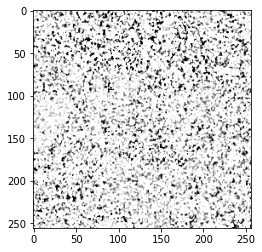

In [ ]:
plt.imshow(s1)

In [ ]:
s1_arr = np.array(s1, np.uint8)

TypeError: ignored

In [ ]:
l=[]
for i in range(s1_arr.shape[0]):
  l.append(max(s1_arr[i]))

In [ ]:
print(max(l))

0


In [ ]:
# plt.plot(s1_arr)
np.shape(s1_arr)

(21000, 29000)

In [ ]:
!pip install rasterio


     |████████████████████████████████| 18.3MB 166kB/s 


In [ ]:
# import matplotlib.pyplot as plt
# import rasterio as rio
# from rasterio.plot import show

# fig, ax = plt.subplots(1, figsize=(12, 10))
# show('gdrive/My Drive/city_tif.tif', ax=ax)
# plt.show()



# Load the data into a flat numpy array and reshape
np_img = np.array(s1.getdata(), dtype='F')
w, h = s1.size
np_img.shape = (h, w, np_img.size // (w * h))



In [ ]:
from osgeo import gdal
import os
 
in_path = 'C:/Users/Marco/Desktop/'
input_filename = 'dtm_5.tif'
 
out_path = 'C:/Users/Marco/Desktop/output_folder/'
output_filename = 'tile_'
 
tile_size_x = 256
tile_size_y = 256
 
ds = gdal.Open('gdrive/My Drive/city_tif.tif', GA_ReadOnly)
print(ds)
# band = ds.GetRasterBand(1)
# xsize = band.XSize
# ysize = band.YSize
 
# for i in range(0, xsize, tile_size_x):
#     for j in range(0, ysize, tile_size_y):
#         com_string = "gdal_translate -of GTIFF -srcwin " + str(i)+ ", " + str(j) + ", " + str(tile_size_x) + ", " + str(tile_size_y) + " " + str(in_path) + str(input_filename) + " " + str(out_path) + str(output_filename) + str(i) + "_" + str(j) + ".jpeg"
#         os.system(com_string)

NameError: ignored

In [ ]:
!cd grive/My Drive

/bin/bash: line 0: cd: too many arguments


In [ ]:
s1_arr = torch.from_numpy(s1_arr)
patches_unfold = s1_arr.unfold(0, 512, 512).unfold(1, 512,512)

NameError: ignored

In [ ]:
patches_unfold.shape

torch.Size([32, 50, 512, 512])

In [ ]:
x = 0
for i in range(patches_unfold.shape[0]):
  for j in range(patches_unfold.shape[1]):
  
    # l = []
    # for i in range(len(patches_unfold[a][b])):
    #   l.append(max(patches_unfold[0][0][i]))

    # print(max(l))
    plt.imshow(patches_unfold[i][j],cmap='gray', vmin=0, vmax=255)
    plt.show()
    plt.imsave('gdrive/My Drive/SARImages/patches/patch'+str(x)+'.jpg', patches_unfold[i][j],cmap='gray', vmin=0, vmax=255)
    print(x)
    x += 1

NameError: ignored

In [ ]:
l = []
for i in range(len(patches[3][5])):
  l.append(max(patches[0][0][i]))

print(max(l))

95


# Loading ImageNet images from drive and making dataloaders

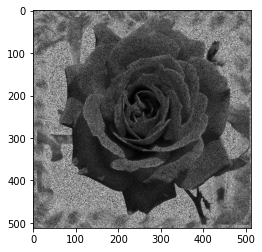

In [ ]:
image = Image.open('gdrive/My Drive/ImageNet/noisy/plants_L_10/plant0.jpg').convert("LA")
tensor_image = transforms.ToTensor()(image)
plt.imshow(tensor_image[0], cmap='gray')

In [2]:
class NoisyImageDataset(Dataset):
    def __init__(self, main_dir, transform):
        self.main_dir = main_dir
        self.transform = transform
        all_imgs = []
        for f in os.listdir(main_dir):
            if not f.startswith('.'):
                all_imgs.append(f)
        self.total_imgs = all_imgs

    def __len__(self):
        return len(self.total_imgs)

    def __getitem__(self, idx):
        img_loc = os.path.join(self.main_dir, self.total_imgs[idx])
        image = Image.open(img_loc).convert("LA")
        tensor_image = self.transform(image)
        return torch.reshape(tensor_image[0], (1, 256, 256))

In [40]:
class NoisePairsDataset(Dataset):
    """
    Return Dataset class representing our data set
    """
    def __init__(self, n1dir, n2dir, transform):
        self.n1 = n1dir
        self.n2 = n2dir
        n1_imgs = []
        for f in os.listdir(n1dir):
            if not f.startswith('.'):
                n1_imgs.append(f)
        n2_imgs = []
        for f in os.listdir(n2dir):
            if not f.startswith('.'):
                n2_imgs.append(f)
        self.path_inputs = n1_imgs  # list of paths to original images
        self.path_labels = n2_imgs  # list of paths to images with noise
        self.transform = transform

    def __len__(self):
        return len(self.path_inputs)  # or path_labels

    def __getitem__(self, idx):

        # Code to load data using Image.open or cv2.imread
        x_loc = os.path.join(self.n1, self.path_inputs[idx])
        y_loc = os.path.join(self.n2, self.path_labels[idx])
#         print(x_loc)
        X = Image.open(x_loc).convert("LA")
        y = Image.open(y_loc).convert("LA")
#         X = cv2.imread(x_loc,0)  # images without noise
#         y = cv2.imread(y_loc,0)  # images with noise
        tensor_x = self.transform(X)
        tensor_y = self.transform(y)

        return torch.reshape(tensor_x[0], (1, 256, 256)), torch.reshape(tensor_y[0], (1, 256, 256))

In [3]:
def load_data(images_dir_list, L, p=1, batch_size=10):
  # images_dir = 'gdrive/My Drive/ImageNet/noisy/'
  # plants_dir = images_dir + 'plants_L_'
  # animals_dir = images_dir + 'animals_L_'
  # scenery_dir = images_dir + 'scenery_L_'

  data_transforms = transforms.Compose([
                                        transforms.RandomResizedCrop(256),
                                        transforms.ToTensor()])
                                                            
  data_set_list = []
  for li in images_dir_list:
    s = ''
    if L !=0:
      s = str(L)
    data_set_list.append(NoisyImageDataset(li+s, transform=data_transforms))
    data_set_list.append(NoisyImageDataset(li+s, transform=data_transforms))
    data_set_list.append(NoisyImageDataset(li+s, transform=data_transforms))
  data_set = torch.utils.data.ConcatDataset(data_set_list)
  l = int(len(data_set)*p)
  print(l)
  train, valid = torch.utils.data.random_split(data_set, [l, len(data_set)-l])
  trainloader = torch.utils.data.DataLoader(train, batch_size=batch_size, shuffle=True, num_workers=2)
  validloader = []
  if len(valid) != 0:
    validloader = torch.utils.data.DataLoader(valid, batch_size=batch_size, shuffle=True, num_workers=2)

  return trainloader, validloader

In [5]:
images_dir = './ImageNet/noisy/'
images_dir_list = [images_dir + 'plants_L_', images_dir + 'animals_L_', images_dir + 'scenery_L_']
dataloader_10,_ = load_data(images_dir_list, 10)
dataloader_25, _ = load_data(images_dir_list, 25)
dataloader_40, _ = load_data(images_dir_list, 40)

5970
5970
5970


In [ ]:
trainloader_10 ,validloader_10 = load_data(10)
trainloader_25 ,validloader_25 = load_data(25)
trainloader_40 ,validloader_40 = load_data(40)

TypeError: ignored

In [ ]:
i=0
for image in dataloader_25:
  print(image.shape)
  i+=1
  break

torch.Size([16, 1, 256, 256])


# Network Architecture and other necessary functions

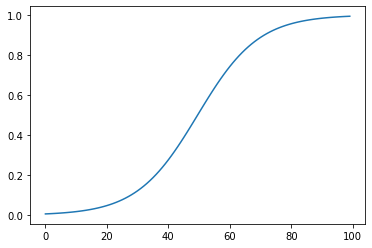

In [18]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

x = np.linspace(-10, 10, 100) 
z = sigmoid(x/2.0) 
plt.plot(z)

In [3]:
class UNet(nn.Module):
  def __init__(self, in_channels=1, out_channels=1, init_features=32):
    super(UNet, self).__init__()

    features = init_features
    self.encoder1 = UNet._block(in_channels, features, name="enc1", kernel_size=7, padding=3)
    self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
    self.encoder2 = UNet._block(features, features * 2, name="enc2", kernel_size=5, padding=2)
    self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
    self.encoder3 = UNet._block(features * 2, features * 4, name="enc3")
    self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
    self.encoder4 = UNet._block(features * 4, features * 8, name="enc4")
    self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)

    self.bottleneck = UNet._block(features * 8, features * 16, name="bottleneck")

    self.upconv4 = nn.ConvTranspose2d(
        features * 16, features * 8, kernel_size=2, stride=2
    )
    self.decoder4 = UNet._block((features * 8) * 2, features * 8, name="dec4")
    self.upconv3 = nn.ConvTranspose2d(
        features * 8, features * 4, kernel_size=2, stride=2
    )
    self.decoder3 = UNet._block((features * 4) * 2, features * 4, name="dec3")
    self.upconv2 = nn.ConvTranspose2d(
        features * 4, features * 2, kernel_size=2, stride=2
    )
    self.decoder2 = UNet._block((features * 2) * 2, features * 2, name="dec2")
    self.upconv1 = nn.ConvTranspose2d(
        features * 2, features, kernel_size=2, stride=2
    )
    self.decoder1 = UNet._block(features * 2, features, name="dec1")

    self.conv = nn.Conv2d(
        in_channels=features, out_channels=out_channels, kernel_size=1
    )

  def forward(self, x):
    enc1 = self.encoder1(x)
#     print(enc1.size())
    enc2 = self.encoder2(self.pool1(enc1))
#     print(enc2.size())
    enc3 = self.encoder3(self.pool2(enc2))
#     print(enc3.size())
    enc4 = self.encoder4(self.pool3(enc3))
#     print(enc4.size())

    bottleneck = self.bottleneck(self.pool4(enc4))
#     print(bottleneck.size())
    dec4 = self.upconv4(bottleneck)
#     print(dec4.size())
    dec4 = torch.cat((dec4, enc4), dim=1)
    dec4 = self.decoder4(dec4)
    dec3 = self.upconv3(dec4)
#     print(dec3.size())
    dec3 = torch.cat((dec3, enc3), dim=1)
    dec3 = self.decoder3(dec3)
    dec2 = self.upconv2(dec3)
#     print(dec2.size())
    dec2 = torch.cat((dec2, enc2), dim=1)
    dec2 = self.decoder2(dec2)
    dec1 = self.upconv1(dec2)
#     print(dec1.size())
    dec1 = torch.cat((dec1, enc1), dim=1)
    dec1 = self.decoder1(dec1)
    out = torch.sigmoid(self.conv(dec1))
#     print(out.size())
    return out

  @staticmethod
  def _block(in_channels, features, name, kernel_size=3, padding=1):
    return nn.Sequential(
        OrderedDict(
            [
                (
                    name + "conv1",
                    nn.Conv2d(
                        in_channels=in_channels,
                        out_channels=features,
                        kernel_size=kernel_size,
                        padding=padding,
                        bias=False,
                    ),
                ),
                (name + "norm1", nn.BatchNorm2d(num_features=features)),
                (name + "relu1", nn.ReLU(inplace=True)),
                (
                    name + "conv2",
                    nn.Conv2d(
                        in_channels=features,
                        out_channels=features,
                        kernel_size=kernel_size,
                        padding=padding,
                        bias=False,
                    ),
                ),
                (name + "norm2", nn.BatchNorm2d(num_features=features)),
                (name + "relu2", nn.ReLU(inplace=True)),
            ]
        )
    )


In [3]:
class UNet(nn.Module):
  def __init__(self, in_channels=1, out_channels=1, init_features=64):
    super(UNet, self).__init__()

    features = init_features
    self.encoder1 = UNet._block(in_channels, features, name="enc1")
    self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
    self.encoder2 = UNet._block(features, features * 2, name="enc2")
    self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
    self.encoder3 = UNet._block(features * 2, features * 4, name="enc3")
    self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
    self.encoder4 = UNet._block(features * 4, features * 8, name="enc4")
    self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)

    self.bottleneck = UNet._block(features * 8, features * 16, name="bottleneck")

    self.upconv4 = nn.ConvTranspose2d(
        features * 16, features * 8, kernel_size=2, stride=2
    )
    self.decoder4 = UNet._block((features * 8) * 2, features * 8, name="dec4")
    self.upconv3 = nn.ConvTranspose2d(
        features * 8, features * 4, kernel_size=2, stride=2
    )
    self.decoder3 = UNet._block((features * 4) * 2, features * 4, name="dec3")
    self.upconv2 = nn.ConvTranspose2d(
        features * 4, features * 2, kernel_size=2, stride=2
    )
    self.decoder2 = UNet._block((features * 2) * 2, features * 2, name="dec2")
    self.upconv1 = nn.ConvTranspose2d(
        features * 2, features, kernel_size=2, stride=2
    )
    self.decoder1 = UNet._block(features * 2, features, name="dec1")

    self.conv = nn.Conv2d(
        in_channels=features, out_channels=out_channels, kernel_size=1
    )

  def forward(self, x):
    enc1 = self.encoder1(x)
#     print(enc1.size())
    enc2 = self.encoder2(self.pool1(enc1))
#     print(enc2.size())
    enc3 = self.encoder3(self.pool2(enc2))
#     print(enc3.size())
    enc4 = self.encoder4(self.pool3(enc3))
#     print(enc4.size())

    bottleneck = self.bottleneck(self.pool4(enc4))
#     print(bottleneck.size())
    dec4 = self.upconv4(bottleneck)
#     print(dec4.size())
    dec4 = torch.cat((dec4, enc4), dim=1)
    dec4 = self.decoder4(dec4)
    dec3 = self.upconv3(dec4)
#     print(dec3.size())
    dec3 = torch.cat((dec3, enc3), dim=1)
    dec3 = self.decoder3(dec3)
    dec2 = self.upconv2(dec3)
#     print(dec2.size())
    dec2 = torch.cat((dec2, enc2), dim=1)
    dec2 = self.decoder2(dec2)
    dec1 = self.upconv1(dec2)
#     print(dec1.size())
    dec1 = torch.cat((dec1, enc1), dim=1)
    dec1 = self.decoder1(dec1)
    out = torch.sigmoid(self.conv(dec1))
#     print(out.size())
    return out

  @staticmethod
  def _block(in_channels, features, name, kernel_size=3, padding=1):
    return nn.Sequential(
        OrderedDict(
            [
                (
                    name + "conv1",
                    nn.Conv2d(
                        in_channels=in_channels,
                        out_channels=features,
                        kernel_size=kernel_size,
                        padding=padding,
                        bias=False,
                    ),
                ),
                (name + "norm1", nn.BatchNorm2d(num_features=features)),
                (name + "relu1", nn.ReLU(inplace=True)),
                (
                    name + "conv2",
                    nn.Conv2d(
                        in_channels=features,
                        out_channels=features,
                        kernel_size=kernel_size,
                        padding=padding,
                        bias=False,
                    ),
                ),
                (name + "norm2", nn.BatchNorm2d(num_features=features)),
                (name + "relu2", nn.ReLU(inplace=True)),
            ]
        )
    )


In [19]:
def add_speckle_noise(img, alpha, beta,c):
  noise = torch.from_numpy(np.random.gamma(alpha, beta, img.shape))
  if c:
    noise = noise.cuda()
  image = img*noise
  torch.clamp(image, min=0, max=1)
  return image

In [20]:
def forward_SAR(x, L, c):
  x = add_speckle_noise(x, L, 1/L, c)
  return x

In [4]:
use_cuda = torch.cuda.is_available()

In [8]:
model_Unet = 1


In [6]:
print(torch.cuda.is_available())

True


In [5]:
wandb.init(project="ssl")
# wandb.login(force=True)

Failed to query for notebook name, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable
wandb: Currently logged in as: akshi11 (use `wandb login --relogin` to force relogin)
/home/201751066/.conda/envs/ssl/lib/python3.8/site-packages/IPython/html.py:12: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  warn("The `IPython.html` package has been deprecated since IPython 4.0. "
wandb: wandb version 0.10.14 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


# Optimizers, loss functions and training loop

In [ ]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model_Unet.parameters(), lr=0.0001)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, 100, eta_min=0, last_epoch=-1)

In [ ]:
# model_test = model_test.double().cuda()
# criterion = nn.MSELoss()
# optimizer = optim.Adam(model_test.parameters(), lr=0.0001)
# scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, 100, eta_min=0, last_epoch=-1)


NameError: ignored

In [6]:
def train(n_epochs, trainloader, L, model, optimizer, criterion, use_cuda, save_path):
  """returns trained model"""
  valid_loss_min = np.Inf
  train_loss_min = np.Inf
  for epoch in range(1, n_epochs+1):
    # initialize variables to monitor training and validation loss

    # monitor time
    current_time = datetime.datetime.now()
    print(current_time) 
    train_loss = 0.0
    valid_loss = 0.0
    # accuracy = 0.0
    ###################
    # train the model #
    ###################
    model.train()
    for batch_idx, image in enumerate(trainloader):
      # move to GPU
      print(batch_idx, end=" ")
      image = image.double()
      if use_cuda:
        image = image.cuda()
      ## find the loss and update the model parameters accordingly
      ## record the average training loss, using something like
      ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
      optimizer.zero_grad()
      x_hat = model(image)
      y_hat = forward_SAR(x_hat, L, use_cuda)
      # print('y_hat calculated')
      loss = criterion(y_hat, image)
      loss.backward()
      # print('loss calculated')
      optimizer.step()
      # print('backpropagation done')
      train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
      wandb.log({"Loss": train_loss})
      
    print(optimizer.param_groups[0]['lr'])
    wandb.log({"lr": optimizer.param_groups[0]['lr']})
    scheduler.step()
    # model.eval()
    # for batch_idx, image in enumerate(validloader):
    #   image = image.double()
    #   if use_cuda:
    #     image = image.cuda()

    #   x_hat = model(image)
    #   y_hat = forward_SAR(x_hat, L, use_cuda)
    #   loss = criterion(y_hat, image)
    #   valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
    print()   
    
    print('Epoch: {} \tTraining Loss: {:.6f} '.format(
        epoch, 
        train_loss
        # valid_loss
        ))
    if train_loss <= train_loss_min:
        print('Valid loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(train_loss_min, train_loss))
        torch.save(model.state_dict(), save_path)
        wandb.save(save_path)
        train_loss_min = train_loss
  return model

In [ ]:
model_trained = train(30, dataloader_25, 25., model_Unet, optimizer, criterion, use_cuda, 'gdrive/My Drive/Checkpoints_UNet/checkpoint7_noaug.pt')

2020-10-12 03:33:16.335501
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 0.0001

Epoch: 1 	Training Loss: 0.016445 
Valid loss decreased (inf --> 0.016445).  Saving model ...
2020-10-12 04:34:12.082346
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 9.997532801828658e-05

Epoch: 2 	Training Loss: 0.009283 
Valid loss decreased (0.016445 --> 0.0

In [ ]:
# model_trained = train(10, trainloader_25, validloader_25, 25, model_test, optimizer, criterion, use_cuda, 'gdrive/My Drive/Checkpoints_UNet/checkpoint2_sche_valid.pt')

0.0001


RuntimeError: ignored

In [ ]:
 path = F"/content/gdrive/My Drive/Checkpoints_UNet/checkpoint7_noaug.pt"
 model_test = UNet()
 model_test.load_state_dict(torch.load(path,map_location=torch.device('cpu')))

FileNotFoundError: ignored

In [ ]:
image = Image.open('gdrive/My Drive/ImageNet/noisy/plants_L_25/plant0.jpg').convert("LA")
data_transforms = transforms.Compose([transforms.RandomResizedCrop(256),
                                        transforms.ToTensor()])
image = torch.reshape(data_transforms(image)[0], (1, 1, 256, 256))
print(image.shape)
# img_out = model_test()

torch.Size([1, 1, 256, 256])


In [ ]:
img_out = model_test(image)
img_out_ = forward_SAR(img_out, 25., False)
loss = criterion(img_out_, image)
print(loss)

tensor(0.0088, dtype=torch.float64, grad_fn=<MseLossBackward>)


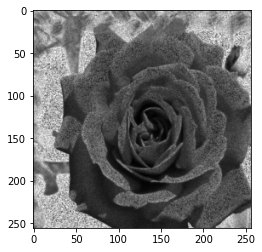

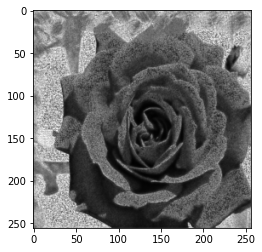

In [ ]:
plt.imshow(image[0][0], cmap='gray')
plt.show()
plt.imshow(img_out[0][0].detach().numpy(), cmap='gray')

In [ ]:
model_new = UNet()

In [ ]:
img_out = model_new(image)
img_out_ = forward_SAR(img_out, 25., False)
loss = criterion(img_out_, image)
print(loss)

tensor(0.0858, dtype=torch.float64, grad_fn=<MseLossBackward>)


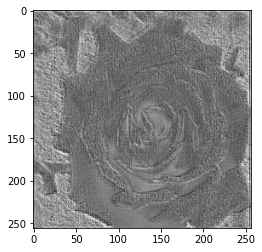

In [ ]:
plt.imshow(img_out[0][0].detach().numpy(), cmap='gray')

In [ ]:
import torch
torch.cuda.get_device_name(0)

'Tesla P100-PCIE-16GB'

In [ ]:
torch.cuda.device_count()

1

In [ ]:
len(dataloader)

NameError: ignored

# Train model for SAR Images

In [6]:
def simulate_speckle(clean_im, L):
    M = np.log(256)
    m = 0
    s = torch.zeros_like(clean_im)
    for k in range(0, L):
        gamma1 = torch.normal(mean=0, std=1, size=clean_im.size())**2
        gamma2 = torch.normal(mean=0, std=1, size=clean_im.size())**2
        s = s + torch.abs(gamma1 + gamma2)
    s_amplitude = torch.sqrt(s / L)
#     print('linear noise',s_amplitude)
    log_speckle = torch.log(s_amplitude)
#     print('log noise',log_speckle)
    log_norm_speckle = log_speckle / (M - m)
#     print('normal log noise',log_norm_speckle)
#     print('clean',clean_im)
    noisy_im = clean_im + log_norm_speckle
#     print('noisy',noisy_im)
    noisy_im = torch.clamp(noisy_im,min=0.0, max = 1.0)
#     print('noisy after clamp',noisy_im)
    return noisy_im

In [6]:
dir_list = './qgissenti'
data_transforms = transforms.Compose([
                                      transforms.ToTensor()])
data_set = NoisyImageDataset(dir_list, data_transforms)
dataloader = torch.utils.data.DataLoader(data_set, batch_size=len(data_set), shuffle=True, num_workers=1)
# num_of_pixels = len(data_set) * 256 * 256
# total_sum = 0
# for batch in dataloader: 
# #     print(batch[0].size())
#     total_sum += batch[0].sum()
# mean = total_sum / num_of_pixels
# sum_of_squared_error = 0
# for batch in dataloader: 
#     sum_of_squared_error += ((batch[0] - mean).pow(2)).sum()
# std = torch.sqrt(sum_of_squared_error / num_of_pixels)

In [7]:
# data = next(iter(dataloader))
# mean, std = data[0].mean(), data[0].std()
# print(mean, std)

In [8]:
data_transforms = transforms.Compose([
                                      transforms.RandomRotation(90),
                                      transforms.ToTensor(),
                                      transforms.Normalize(0.5, 0.5)
                                        ])
dataset = NoisyImageDataset(dir_list, data_transforms)
# dataloaderSAR = torch.utils.data.DataLoader(dataset, batch_size=len(dataset), shuffle=True, num_workers=2)

In [9]:
l = int(len(dataset)*0.9)
train, valid = torch.utils.data.random_split(dataset, [l, len(dataset)-l])
trainloaderSAR = torch.utils.data.DataLoader(train, batch_size=16, shuffle=True, num_workers=2)
validloaderSAR = torch.utils.data.DataLoader(valid, batch_size=10, shuffle=True, num_workers=2)

In [13]:
dirpath = './BSD'
datatransforms = transforms.Compose([ 
                                      transforms.RandomResizedCrop(256),
                                      transforms.ToTensor()])
data_set_train = NoisyImageDataset(dirpath+'/train', datatransforms)
data_set_valid = NoisyImageDataset(dirpath+'/valid', datatransforms)
dataloadertrain = torch.utils.data.DataLoader(data_set_train, batch_size=1, shuffle=True, num_workers=1)
dataloadervalid = torch.utils.data.DataLoader(data_set_valid, batch_size=1, shuffle=True, num_workers=1)
for idx,image in enumerate(dataloadertrain):
#     b_hat = 10.0
#     noise1 = torch.from_numpy(np.random.gamma(b_hat, 1/b_hat, image.shape))
#     image = image*noise1
    image = lintolog(image)
    image = simulate_speckle(image, 4)
    plt.imsave('./BSDnoisy/train/'+str(idx)+'.jpg',logtolin(image[0][0]), cmap='gray')
for idx,image in enumerate(dataloadervalid):
#     b_hat = 10.0
#     noise1 = torch.from_numpy(np.random.gamma(b_hat, 1/b_hat, image.shape))
#     image = image*noise1
    image = lintolog(image)
    image = simulate_speckle(image, 4)
    plt.imsave('./BSDnoisy/train/val'+str(idx)+'.jpg',logtolin(image[0][0]), cmap='gray')
#     image = lintolog(image)
#     img = simulate_speckle(image, 10)
#     plt.imsave('./BSDcorr/n2/valid/'+str(idx)+'.jpg',logtolin(img[0][0]), cmap='gray')   



In [48]:
n1 = './BSDcorr/n1'
n2 = './BSDcorr/n2'
data_transforms = transforms.Compose([transforms.RandomResizedCrop(256),
                                      transforms.RandomRotation(90),
                                      transforms.ToTensor(),
                                        ])
trainsetpairs = NoisePairsDataset(n1+'/train', n2+'/train', data_transforms)
validsetpairs = NoisePairsDataset(n1+'/valid', n2+'/valid', data_transforms)
trainpairloader = torch.utils.data.DataLoader(trainsetpairs, batch_size=5, shuffle=True, num_workers=2)
validpairloader = torch.utils.data.DataLoader(validsetpairs, batch_size=5, shuffle=True, num_workers=2)
# x, y= next(iter(trainpairloader))
# print(x.size(), y.size())

In [7]:
# data_transforms = transforms.Compose([
# #                                         transforms.RandomResizedCrop(256),
#                                       transforms.RandomRotation(90),
#                                       transforms.ToTensor(),
#                                         ])
# trainset = NoisyImageDataset('BSDnoisy/train', data_transforms)
# dataloader = torch.utils.data.DataLoader(trainset, batch_size=len(trainset), shuffle=True, num_workers=1)
# data = next(iter(dataloader))
# mean, std = data[0].mean(), data[0].std()
# print(mean, std)
data_transforms = transforms.Compose([
                                      transforms.RandomRotation(90),
                                      transforms.ToTensor(),
                                      transforms.Normalize(0.5, 0.5)
                                        ])
# validset = NoisyImageDataset(dirpath+'/valid', data_transforms)
dataset = NoisyImageDataset('BSDnoisy/train', data_transforms)
l = int(len(dataset)*0.8)
train, valid = torch.utils.data.random_split(dataset, [l, len(dataset)-l])
trainloader = torch.utils.data.DataLoader(train, batch_size=16, shuffle=True, num_workers=2)
validloader = torch.utils.data.DataLoader(valid, batch_size=16, shuffle=True, num_workers=2)

In [10]:
data = next(iter(dataloaderSAR))
mean_new, std_new = data[0].mean(), data[0].std()
print(mean_new, std_new)

NameError: name 'dataloaderSAR' is not defined

In [15]:
def psi(a):
  return special.digamma(a)

In [32]:
def forward_NoiseEST(img):
  img = img.cpu().numpy()
  img = np.ceil(img*255)
  x = img.ravel()
  x[x == 0] = 1
  mean = np.mean(img.ravel())
  logs = np.mean(np.log(x))
  # log_of_mean = np.log(np.mean(x))
  log_of_mean = np.log(np.mean(x))
  a_hat = 2
  for _ in range(50):
    a_hat = 1/(1/a_hat + (logs - log_of_mean + np.log(a_hat) - psi(a_hat))/( (a_hat**2)*(1/a_hat - special.polygamma(1,a_hat)) ))

  b_hat = mean/a_hat
  # var = 
  # noise = torch.from_numpy(np.random.gamma(b_hat, 1/b_hat, img.shape))
  # # print('b_hat = ', b_hat)
  # x_hat = torch.ceil(x_hat*255)
  # if c:
  #   noise = noise.cuda()
  
  # # plt.imshow(noise[0][0], cmap='gray')
  # y_hat = (x_hat*noise)
  # # plt.hist(noise[0][0])
  # # print(max(y_hat[0][0][0]))
  # y_hat = y_hat/255
  # torch.clamp(y_hat, min=0, max=1)
  # # plt.imshow(noise, cmap='gray')
  return b_hat


In [35]:
l=0
i=0
for image in trainloaderSAR:
    l+=forward_NoiseEST(image)
    i+=1
print(l/i)

57.42351002959345


In [36]:
print(i, len(trainloaderSAR))

5689 5689


In [ ]:
n = (forward_NoiseEST(image, image, False))
print(max(np.array(n).ravel()))

17.912420344549385
3.0391541887881957


In [14]:
use_cuda = False

In [8]:
model_S = UNet().double()
if use_cuda:
  model_S = model_S.cuda()
print(use_cuda)

RuntimeError: CUDA error: out of memory

In [ ]:
def init_weights(m):
  if isinstance(m, nn.Conv2d):
    nn.init.kaiming_normal_(m.weight)

  elif isinstance(m, nn.BatchNorm2d):
    nn.init.constant_(m.weight, 1)
    nn.init.constant_(m.bias, 0)

  elif isinstance(m, nn.Linear):
    nn.init.kaiming_normal_(m.weight)
    nn.init.constant_(m.bias, 0)

In [ ]:
model_SAR = model_S.apply(init_weights)

In [13]:
model_SAR

UNet(
  (encoder1): Sequential(
    (enc1conv1): Conv2d(1, 32, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), bias=False)
    (enc1norm1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (enc1relu1): ReLU(inplace=True)
    (enc1conv2): Conv2d(32, 32, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), bias=False)
    (enc1norm2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (enc1relu2): ReLU(inplace=True)
  )
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (encoder2): Sequential(
    (enc2conv1): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False)
    (enc2norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (enc2relu1): ReLU(inplace=True)
    (enc2conv2): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False)
    (enc2norm2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, tra

In [ ]:
wandb.watch(model_SAR)

In [14]:
class SURE_Loss(nn.Module):
  def __init__(self):
    super().__init__()

  def forward(self, y, y_hat, z_hat, n, x_dim, var, batch_size, eps):
    div = (1/eps)*torch.sum((n * (z_hat - y_hat)))   #.view(-1,y.shape[0]*y.shape[1] )
    sure = (1.0 / batch_size)*(torch.sum((y - y_hat)**2) - (batch_size * x_dim * x_dim * var) + (2*var*div))
    return abs(sure)

In [15]:
def _get_float32(image):
    """
    Convert pixel values to float32
    @param image  : the image for which to convert pixel values as a numpy array
    @returns image: the image as a numpy array of float32 values
    @returns dtype: the dtype of the array that was passed to the function
    """
    dtype = image.dtype
    if dtype != np.float32:
        image = image.astype(np.float32)
    return image, dtype

def _revert_dtype(image, dtype):
    """
    Converts pixel values to a specified dtype
    @param image: the image for which to convert pixel values as a numpy array
    @param dtype: the dtype to convert the image to
    @returns    : the image as a numpy array of float32 values
    """
    current_dtype = image.dtype
    if current_dtype != dtype:
        image = image.astype(dtype)
    return image

def stretch(image, max_val=1, min_val=0):
    """
    Stretch the pixel values of an image to the specified range
    @param image : an image as np.array
    @max_val     : the maximum possible value of a pixel
                   defaults to 255
    @min_val     : the minimum possible value of a pixel
                   defaults to 0
    """
    image, dtype = _get_float32(image)
    img_min = np.min(image)
    img_max = np.max(image)
    image_stretched = min_val + (max_val - min_val) * (image - img_min) / (img_max - img_min)
    image_stretched = _revert_dtype(image_stretched, dtype)
    return image_stretched

In [16]:
def lintolog(image, max_val=1.0, min_val=-1.0):
    image = image.numpy()
#   maxi = np.max(image)
#   mini = np.min(image)
#   img =  ((image)*255)
# #   print(np.max(img), np.min(img))
#   img_L = np.log(img+1)
#   log_max = np.log(255 + 1)
#   img_L = img_L/log_max
# #   print(np.max(img_L))
#   # print(np.max(img_L), np.min(img_L))
#   img_L = torch.DoubleTensor(img_L.astype('float32'))
#   return img_L
    LIN_MAX = 1.0
    LOG_MAX = np.log10(LIN_MAX + 1)
    image, dtype = _get_float32(image)
    img_min = np.min(image)
    img_max = np.max(image)
    stretch_max = LIN_MAX * (img_max - min_val) / (max_val - min_val)
    stretch_min = LIN_MAX * (img_min - min_val) / (max_val - min_val)
    image = stretch(image, max_val=stretch_max, min_val=stretch_min)
    image = np.log10(image + 1)
    image = image / LOG_MAX
    image = _revert_dtype(image, dtype)
    return torch.DoubleTensor(image)

In [17]:
def logtolin(image, max_val=1.0, min_val=0):
    image = image.detach().numpy()
#   maxi = np.max(image)
#   mini = np.min(image)
#   log_max = np.log(255 + 1)
#   img = ((image)*log_max)
#   img = np.power(np.exp(1), img) - 1
#   img = img / 255.0
#   img = torch.DoubleTensor(img.astype('float32'))
#   return img
    LIN_MAX = 1.0
    LOG_MAX = np.log10(LIN_MAX + 1)
    image, dtype = _get_float32(image)
    img_min = np.min(image)
    img_max = np.max(image)
    stretch_max = LOG_MAX * (img_max - min_val) / (max_val - min_val)
    stretch_min = LOG_MAX * (img_min - min_val) / (max_val - min_val)
    image = stretch(image, max_val=stretch_max, min_val=stretch_min)
    image = np.power(10, image) - 1
    image = image / LIN_MAX 
    image = _revert_dtype(image, dtype)
    return torch.DoubleTensor(image)

In [15]:
print(np.log(256)**2)

30.74899289076489


In [15]:
loss = SURE_Loss()
y = torch.FloatTensor([[.546,.769],[.564,.98]])
y_hat = torch.FloatTensor([[.45,.234],[.65,.754]])
n = np.random.normal(0, 1, size=y.shape)
x_dim = 256
var = 10.
batch_size=16
eps = 0.01
z_hat = y + n*eps
l = loss(y, y_hat, z_hat, n, x_dim, var, batch_size, eps)
print(l)

TypeError: unsupported operand type(s) for *: 'numpy.ndarray' and 'Tensor'

In [16]:
criterion = nn.MSELoss()

In [12]:
model_SAR2 = UNet()
model_SAR2.load_state_dict(torch.load("./Checkpoints_UNet/cp_ESURE_gaussadd_lr001_new.pt"))
if use_cuda:
  model_SAR2 = model_SAR2.double().cuda()

In [18]:
optimizer = optim.Adam(model_SAR.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, 30, eta_min=0, last_epoch=-1)
# scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

In [19]:
criterion = SURE_Loss()

In [14]:
image = torch.DoubleTensor([[.24,.253],[.65,.43]])
n = torch.DoubleTensor(np.random.normal(0, 1, size=image.size()))
img_z = image + torch.DoubleTensor(n*0.01)
print(n.size())
print(img_z.size())
# img_z = image + torch.DoubleTensor(n*eps).cuda()

torch.Size([2, 2])
torch.Size([2, 2])


In [16]:
print(special.polygamma(1,15))

0.0689382278476838


In [19]:
def train_SAR(n_epochs, trainloader, model, optimizer, criterion, use_cuda, save_path, lr=0.01):
  """returns trained model"""
  # n_epochs = 20
  # trainloader = dataloader_25
  # save_path = 'gdrive/My Drive/Checkpoints_UNet/checkpoint_imnet.pt'
  valid_loss_min = np.Inf
  train_loss_min = np.Inf
  for epoch in range(1, n_epochs+1):
    
    # initialize variables to monitor training and validation loss

    # monitor time
    current_time = datetime.datetime.now()
    print(current_time) 
    train_loss = 0.0
    valid_loss = 0.0
    # accuracy = 0.0
    ###################
    # train the model #
    ###################
    model.train()
    print(optimizer.param_groups[0]['lr'])
    wandb.log({"lr": optimizer.param_groups[0]['lr']})
    for batch_idx, image in enumerate(trainloader):
      # move to GPU
#       print(1.0/torch.var(image))
      print(batch_idx, end=" ")
      image = image.double()
#       b_hat = 100.0
#       noise1 = torch.from_numpy(np.random.gamma(b_hat, 1/b_hat, image.shape))
# #       noise2 = torch.from_numpy(np.random.gamma(b_hat, 1/b_hat, image.shape))
#       noisy1 = image*noise1
# #       noisy2 = image*noise2
      image = lintolog(image)
#       noisy1 = lintolog(noisy1)
#       noisy2 = lintolog(noisy2)
#       plt.imshow(lintolog(noise1)[0][0],cmap='gray')
#       noisy1 = noisy1 + lintolog(noise1)
#       print(max(noisy1[0][0][0]))
#       noisy2 = torch.clamp(noisy2 + lintolog(noise2), min=0, max=1)
#       plt.imshow(noisy1[0][0],cmap='gray')
      if use_cuda:
        image = image.cuda()
#         noisy1 = noisy1.cuda()
#         noisy2 = noisy2.cuda()
      ## find the loss and update the model parameters accordingly
      ## record the average training loss, using something like
      ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
      optimizer.zero_grad()
      y_hat = model(image)
      # y_hat = forward_NoiseEST(image, x_hat, use_cuda)
      # print('y_hat calculated')
      # loss = criterion(y_hat, image)
      eps = 0.000001
      x_dim = 256
      n = torch.DoubleTensor(np.random.normal(0, 1, size=image.size()))
      img_z = image + torch.DoubleTensor(n*eps).cuda()
      z_hat = model(img_z)
      sigma = 1/torch.var(image)
#       print(sigma)
      var = (sigma/255.0)**2
      loss = criterion(image, y_hat, z_hat, n.cuda(), x_dim, var, 10, eps)
      loss.backward()
      # print('loss calculated')
      optimizer.step()
      # print('backpropagation done')
      train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
      wandb.log({"Running Loss": loss.data})
      
    
#     scheduler.step()
    # model.eval()
    # for batch_idx, image in enumerate(validloader):
    #   image = image.double()
    #   if use_cuda:
    #     image = image.cuda()

    #   x_hat = model(image)
    #   y_hat = forward_NoiseEST(image, x_hat, use_cuda)
    #   loss = criterion(y_hat, image)
    #   valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
    #   wandb.log({"Valid Loss": valid_loss})
    print()   
    
    print('Epoch: {} \tTraining Loss: {:.6f} '.format(
        epoch, 
        train_loss,
        # valid_loss
        ))
    wandb.log({"Train Loss": train_loss})
    if train_loss <= train_loss_min:
        print('Train loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(train_loss_min, train_loss))
        torch.save(model.state_dict(), save_path)
#         wandb.save(save_path)
        train_loss_min = train_loss
  return model

In [14]:
def train_SAR_N2N_valid(n_epochs, trainloader, validloader, model, optimizer, criterion, use_cuda, save_path, lr=0.0001):
  """returns trained model"""
  # n_epochs = 20
  # trainloader = dataloader_25
  # save_path = 'gdrive/My Drive/Checkpoints_UNet/checkpoint_imnet.pt'
  valid_loss_min = np.Inf
  train_loss_min = np.Inf
  for epoch in range(1, n_epochs+1):
#     if epoch%10 == 0:
#         lr = lr/10.0
#         optimizer = optim.Adam(model.parameters(), lr=lr)
    # initialize variables to monitor training and validation loss

    # monitor time
    current_time = datetime.datetime.now()
    print(current_time) 
    train_loss = 0.0
    valid_loss = 0.0
    # accuracy = 0.0
    ###################
    # train the model #
    ###################
    model.train()
    print(optimizer.param_groups[0]['lr'])
    wandb.log({"lr": optimizer.param_groups[0]['lr']})
    for batch_idx, image in enumerate(trainloader):
      # move to GPU
      print(batch_idx, end=" ")
      image = image.double()
#       image = lintolog(image)
      b_hat = 10.0
      noise1 = torch.from_numpy(np.random.gamma(b_hat, 1/b_hat, image.shape))
#       noise2 = torch.from_numpy(np.random.gamma(b_hat, 1/b_hat, image.shape))
      
      y1 = image*noise1
#       y2 = image*noise2
#       y1 = torch.clamp(y1, max=0.0, min=1.0)
#       y2 = torch.clamp(y2, max=0.0, min=1.0)
      image = lintolog(image)
#       y1 = simulate_speckle(image, 10)
#       y2 = simulate_speckle(image, 10)
#       print(torch.var(y1), torch.var(y2))
#       y1 = image + torch.from_numpy(np.random.normal(0, 0.1, image.shape))
#       y2 = image + torch.from_numpy(np.random.normal(0, 0.1, image.shape))
      y1 = lintolog(y1)
#       y2 = lintolog(y2)
#       w = (y1+y2)/2
#       v = w+torch.DoubleTensor(np.random.normal(0, torch.var(w), size=w.size()))
#       w = (noisy1+noisy2)/2
#       print(torch.sqrt(torch.var(noisy2)))
#       print(torch.sqrt(torch.var(w)))
#       plt.imshow(lintolog(noise1)[0][0],cmap='gray')
#       noisy1 = noisy1 + lintolog(noise1)
#       print(max(noisy1[0][0][0]))
#       noisy2 = torch.clamp(noisy2 + lintolog(noise2), min=0, max=1)
#       plt.imshow(noisy1[0][0],cmap='gray')
      if use_cuda:
#         v = v.cuda()
#         w = w.cuda()
        image = image.cuda()
#         w = w.cuda()
        y1 = y1.cuda()
#         y2 = y2.cuda()
    

      ## find the loss and update the model parameters accordingly
      ## record the average training loss, using something like
      ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
      optimizer.zero_grad()
      y_hat = model(y1)
      # y_hat = forward_NoiseEST(image, x_hat, use_cuda)
      # print('y_hat calculated')
      # loss = criterion(y_hat, image)
#       print(torch.var(image))
#       print(torch.var(noisy1))
#       var = 1.64493407/(np.log(256)**2)
#       var = 0.0014
#       sigma = 10.0
#       eps = 1.6*sigma*0.0001
#       x_dim = 256
#       var = (sigma/255.0)**2
# #       print(torch.var(w))
#       n = torch.DoubleTensor(np.random.normal(0, 1, size=w.size()))
#       neps = torch.DoubleTensor(n*eps).cuda()
#       img_z = v + neps
#       z_hat = model(img_z)
      
#       print(sigma)
      
      loss = criterion(image, y_hat)
      loss.backward()
      # print('loss calculated')
      optimizer.step()
      # print('backpropagation done')
      train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
      wandb.log({"Loss": train_loss})
      
    
    scheduler.step()
    model.eval()
    for batch_idx, image in enumerate(validloader):
      image = image.double()
#       image = lintolog(image)
      b_hat = 10.0
      noise1 = torch.from_numpy(np.random.gamma(b_hat, 1/b_hat, image.shape))
#       noise2 = torch.from_numpy(np.random.gamma(b_hat, 1/b_hat, image.shape))
      
      y1 = image*noise1
      image = lintolog(image)
#       y2 = image*noise2
#       y1 = torch.clamp(y1, max=0.0, min=1.0)
#       y2 = torch.clamp(y2, max=0.0, min=1.0)
      y1 = lintolog(y1)
#       y2 = lintolog(y2)
      if use_cuda:
        y1 = y1.cuda()
#         y2 = y2.cuda()
        image = image.cuda()
#         noisy1 = noisy1.cuda()
      y_hat = model(y1)
#       var = 0.0014
#       sigma = 10.0
#       eps = 1.6*sigma*0.0001
#       var = (sigma/255.0)**2
#       x_dim = 256
#       n = torch.DoubleTensor(np.random.normal(0, 1, size=w.size()))
#       neps = torch.DoubleTensor(n*eps).cuda()
#       img_z = v + neps
#       z_hat = model(img_z)
      loss = criterion(image, y_hat)
      valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
      
    print()   
    
    print('Epoch: {} \tTraining Loss: {:.6f} \tValid Loss: {:.6f}'.format(
        epoch, 
        train_loss,
        valid_loss
        ))
    wandb.log({"Train Loss": train_loss, 
              "Valid Loss": valid_loss})
    if valid_loss <= valid_loss_min:
        print('Valid loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min, valid_loss))
        torch.save(model.state_dict(), save_path)
#         wandb.save(save_path)
        valid_loss_min = valid_loss
  return model

In [20]:
def train_SAR_ESURE_valid(n_epochs, trainloader, validloader, model, optimizer, criterion, use_cuda, save_path, lr=0.0001):
  """returns trained model"""
  # n_epochs = 20
  # trainloader = dataloader_25
  # save_path = 'gdrive/My Drive/Checkpoints_UNet/checkpoint_imnet.pt'
  valid_loss_min = np.Inf
  train_loss_min = np.Inf
  for epoch in range(1, n_epochs+1):
#     if epoch%10 == 0:
#         lr = lr/10.0
#         optimizer = optim.Adam(model.parameters(), lr=lr)
    # initialize variables to monitor training and validation loss

    # monitor time
    current_time = datetime.datetime.now()
    print(current_time) 
    train_loss = 0.0
    valid_loss = 0.0
    # accuracy = 0.0
    ###################
    # train the model #
    ###################
    model.train()
    print(optimizer.param_groups[0]['lr'])
    wandb.log({"lr": optimizer.param_groups[0]['lr']})
    for batch_idx, image in enumerate(trainloader):
      # move to GPU
      print(batch_idx, end=" ")
      image = image.double()
      image = lintolog(image)
#       b_hat = 10.0
#       noise1 = torch.from_numpy(np.random.gamma(b_hat, 1/b_hat, image.shape))
#       noise2 = torch.from_numpy(np.random.gamma(b_hat, 1/b_hat, image.shape))
      
#       y1 = image*noise1
#       y1 = torch.clamp(y1, max=0.0, min=1.0)
#       y2 = image*noise2
      
#       image = lintolog(image)
#       y1 = simulate_speckle(image, 10)
#       y2 = simulate_speckle(image, 10)
#       print(torch.var(y1), torch.var(y2))
#       y1 = image + torch.from_numpy(np.random.normal(0, 0.1, image.shape))
#       y2 = image + torch.from_numpy(np.random.normal(0, 0.1, image.shape))
#       y1 = lintolog(y1)
      y1 = image + torch.from_numpy(np.random.normal(0, 0.1, image.shape))
#       y2 = lintolog(y2)
#       w = (y1+y2)/2
#       v = w+torch.DoubleTensor(np.random.normal(0, torch.var(w), size=w.size()))
#       w = (noisy1+noisy2)/2
#       print(torch.sqrt(torch.var(noisy2)))
#       print(torch.sqrt(torch.var(w)))
#       plt.imshow(lintolog(noise1)[0][0],cmap='gray')
#       noisy1 = noisy1 + lintolog(noise1)
#       print(max(noisy1[0][0][0]))
#       noisy2 = torch.clamp(noisy2 + lintolog(noise2), min=0, max=1)
#       plt.imshow(noisy1[0][0],cmap='gray')
      if use_cuda:
#         v = v.cuda()
#         w = w.cuda()
        image = image.cuda()
        y1 = y1.cuda()

      ## find the loss and update the model parameters accordingly
      ## record the average training loss, using something like
      ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
      optimizer.zero_grad()
      y_hat = model(y1)
      # y_hat = forward_NoiseEST(image, x_hat, use_cuda)
      # print('y_hat calculated')
      # loss = criterion(y_hat, image)
#       print(torch.var(image))
#       print(torch.var(noisy1))
#       var = 1.64493407/(np.log(256)**2)
#       var = 0.0014
      sigma = 15.0
      eps = 1.6*sigma*0.0001
      x_dim = 256
      var = (sigma/255.0)**2
#       print(torch.var(w))
      n = torch.DoubleTensor(np.random.normal(0, 1, size=y1.size()))
      neps = torch.DoubleTensor(n*eps).cuda()
      img_z = y1 + neps
      z_hat = model(img_z)
      
#       print(sigma)
      
      loss = criterion(image, y_hat, z_hat, n.cuda(), x_dim, var, 16, eps)
      loss.backward()
      # print('loss calculated')
      optimizer.step()
      # print('backpropagation done')
      train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
      wandb.log({"Loss": train_loss})
      
    
    scheduler.step()
#     model.eval()
#     for batch_idx, image in enumerate(validloader):
#       image = image.double()
#       image = lintolog(image)
# #       b_hat = 10.0
# #       noise1 = torch.from_numpy(np.random.gamma(b_hat, 1/b_hat, image.shape))
# #       noise2 = torch.from_numpy(np.random.gamma(b_hat, 1/b_hat, image.shape))
# #       y1 = image*noise1
# #       y1 = torch.clamp(y1, max=0.0, min=1.0)
# #       y2 = image*noise2
# #       image = lintolog(image)
# #       y1 = simulate_speckle(image, 10)
# #       y2 = simulate_speckle(image, 10)
# #       noisy1 = lintolog(noisy1)
#       y1 = image + torch.from_numpy(np.random.normal(0, 0.1, image.shape))
# #       y2 = image + torch.from_numpy(np.random.normal(0, 0.1, image.shape))
# #       y1 = lintolog(y1)
# #       y2 = lintolog(y2)
# #       w = (y1+y2)/2
# #       v = w+torch.DoubleTensor(np.random.normal(0, torch.var(w), size=w.size()))
#       if use_cuda:
# #         v = v.cuda()
# #         w = w.cuda()
#         image = image.cuda()
#         y1 = y1.cuda()
#       y_hat = model(y1)
# #       var = 0.0014
#       sigma = 5.1
#       eps = 1.6*sigma*0.0001
#       var = (sigma/255.0)**2
#       x_dim = 256
#       n = torch.DoubleTensor(np.random.normal(0, 1, size=y1.size()))
#       neps = torch.DoubleTensor(n*eps).cuda()
#       img_z = y1 + neps
#       z_hat = model(img_z)
#       loss = criterion(image, y_hat, z_hat, n.cuda(), x_dim, var, 10, eps)
#       valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
    
    print()   
    
    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch, 
        train_loss,
#         valid_loss
        ))
    wandb.log({"Train Loss": train_loss, 
#               "Valid Loss": valid_loss
              })
    if train_loss <= train_loss_min:
        print('Train loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(train_loss_min, train_loss))
        torch.save(model.state_dict(), save_path)
#         wandb.save(save_path)
        train_loss_min = train_loss
  return model

http://localhost:8888/?token=44083da40b7097c3f91524af7f29bb8e36cb6d8ed2ae1a05 can train cp_SURE_lr001.pt further

In [21]:
model_trained = train_SAR_ESURE_valid(30, trainloaderSAR, validloaderSAR, model_SAR, optimizer, criterion, use_cuda, './Checkpoints_UNet/cp_ESURE_gaussadd_senti_lr001_sigma15_noval_norm.pt')

2021-01-18 22:55:29.124767
0.001
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 2

KeyboardInterrupt: 

In [18]:
optimizer = optim.Adam(model_trained.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, 5, eta_min=0, last_epoch=-1)

In [19]:
np.log(256)

5.545177444479562

In [8]:
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm() 

ln: cannot remove '/usr/bin/nvidia-smi': Permission denied
  Running setup.py install for gputil ... error
    Complete output from command /usr/bin/python2 -u -c "import setuptools, tokenize;__file__='/tmp/pip-build-lnU1XP/gputil/setup.py';exec(compile(getattr(tokenize, 'open', open)(__file__).read().replace('\r\n', '\n'), __file__, 'exec'))" install --record /tmp/pip-TuZCnn-record/install-record.txt --single-version-externally-managed --compile:
    running install
    running build
    running build_py
    creating build
    creating build/lib
    creating build/lib/GPUtil
    copying GPUtil/demo_GPUtil.py -> build/lib/GPUtil
    copying GPUtil/GPUtil.py -> build/lib/GPUtil
    copying GPUtil/__init__.py -> build/lib/GPUtil
    running install_lib
    creating /usr/lib/python2.7/site-packages/GPUtil
    error: could not create '/usr/lib/python2.7/site-packages/GPUtil': Permission denied
    
    ----------------------------------------
Command "/usr/bin/python2 -u -c "import setupto

ModuleNotFoundError: No module named 'humanize'

In [ ]:
!kill -9 -1

In [ ]:
path = F"gdrive/My Drive/Checkpoints_Unet/checkpoint1.pt"
model_test = UNet()
model_test.load_state_dict(torch.load(path,map_location=torch.device('cpu')))

<All keys matched successfully>

In [ ]:
image = Image.open('./gdrive/My Drive/SARimages/17/tiles/54062.png').convert("LA")
data_transforms = transforms.Compose([transforms.RandomResizedCrop(256),
                                        transforms.ToTensor()])
image = torch.reshape(data_transforms(image)[0], (1, 1, 256, 256))

print(image.shape)

torch.Size([1, 1, 256, 256])


In [ ]:
img_out = model_test(image)
img_out_ = forward_NoiseEST(image, img_out, False)
loss = criterion(img_out_, image)
print('loss', loss)

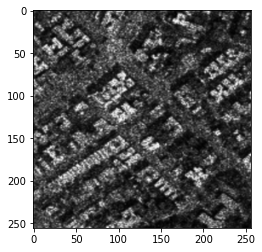

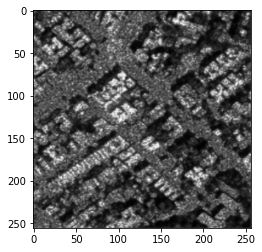

In [ ]:
plt.imshow(image[0][0].detach().numpy(), cmap='gray')
plt.show()
plt.imshow(img_out[0][0].detach().numpy(), cmap='gray')
# print(img_out[0][0][0])

In [ ]:
ENL = np.mean(img_out[0][0].detach().numpy())**2/np.var(img_out[0][0].detach().numpy())
print(ENL)

4.241554861452296


In [ ]:
model_test = model_test.double().cuda

In [ ]:
for param in model_test.parameters():
  param.required_grad = True

In [ ]:
optimizer = optim.Adam(model_test.parameters(), lr=0.0001)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, 20, eta_min=0, last_epoch=-1)

In [ ]:
model_trained = train_SAR(30, dataloaderSAR, model_test, optimizer, criterion, use_cuda, 'gdrive/My Drive/Checkpoints_UNet/checkpoint_SAR_p0001_valid.pt')

2020-10-16 05:54:13.003887
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 0.0001

Epoch: 1 	Training Loss: 0.087405 
Train loss decreased (inf --> 0.087405).  Saving model ...
2020-10-16 06:43:46.156147
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 9.938441702975689e-05

Epoch: 2 	Training Loss: 0.086525 
Train loss decreased (0.000000 --> 0.086525).  Saving model ...
2020-10-16 07:33:16.131582
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43

KeyboardInterrupt: ignored

# Transfer Learning

In [ ]:
!pip3 install segmentation_models_pytorch

     |████████████████████████████████| 61kB 3.0MB/s 
     |████████████████████████████████| 163kB 11.1MB/s 
     |████████████████████████████████| 61kB 7.5MB/s 
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.6.3-cp36-none-any.whl size=12421 sha256=bf17c8dc81f81e815cdf106e1d40c5af4f7f51a546268a91c443d47d74540a40
  Stored in directory: /root/.cache/pip/wheels/42/1e/a9/2a578ba9ad04e776e80bf0f70d8a7f4c29ec0718b92d8f6ccd
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-cp36-none-any.whl size=60964 sha256=26440c343d1bb80fad37a27caab79ea1f001ea49122d4e5e2c4e18ba0259b2bc
  Stored in directory: /root/.cache/pip/wheels/69/df/63/62583c096289713f22db605aa2334de5b591d59861a02c2ecd
Successfully built efficientnet-pytorch pretrainedmodels


In [ ]:
import segmentation_models_pytorch as smp

In [ ]:
def init_weights(m):
  if isinstance(m, nn.Conv2d):
    nn.init.kaiming_normal_(m.weight)

  elif isinstance(m, nn.BatchNorm2d):
    nn.init.constant_(m.weight, 1)
    nn.init.constant_(m.bias, 0)

  elif isinstance(m, nn.Linear):
    nn.init.kaiming_normal_(m.weight)
    nn.init.constant_(m.bias, 0)

In [ ]:
model_transfer = smp.Unet("resnet34", encoder_weights="imagenet", activation=None, decoder_use_batchnorm=True, in_channels=1, classes=1)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [ ]:
if use_cuda:
  model_transfer = model_transfer.double().cuda()

In [ ]:
model_transfer.apply(init_weights)

Unet(
  (encoder): ResNetEncoder(
    (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track

In [ ]:
optimizer = optim.Adam(model_transfer.parameters(), lr=0.0001)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, 20, eta_min=0, last_epoch=-1)

In [ ]:
model_tr_trained = train_SAR_valid(30, trainloaderSAR, validloaderSAR, model_transfer, optimizer, criterion, use_cuda, 'gdrive/My Drive/Checkpoints_UNet/checkpoint_new_SAR_transfer_p0001_valid.pt')

2020-10-16 12:36:57.185317
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 0.0001

Epoch: 1 	Training Loss: 0.113676 
Valid loss decreased (inf --> 0.042242).  Saving model ...
2020-10-16 12:44:25.118303
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 9.938441702975689e-05

Epoch: 2 	Training Loss: 0.017905 
Valid loss decreased (0.042242 --> 0.022224).  Saving model ...
2020-10-16 12:51:53.220313
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 9.755282581475

KeyboardInterrupt: ignored

In [ ]:
path = F"gdrive/My Drive/Checkpoints_UNet/checkpoint_new_SAR_transfer_p0001_valid.pt"
model_test = smp.Unet("resnet34", encoder_weights="imagenet", activation=None, decoder_use_batchnorm=True, in_channels=1, classes=1)
model_test.load_state_dict(torch.load(path,map_location=torch.device('cpu')))

<All keys matched successfully>

In [ ]:
image = Image.open('gdrive/My Drive/SARImages/patches/patch45.jpg').convert("LA")
data_transforms = transforms.Compose([transforms.RandomResizedCrop(256),
                                        transforms.ToTensor()])
image = torch.reshape(data_transforms(image)[0], (1, 1, 256, 256))
print(image.shape)

torch.Size([1, 1, 256, 256])


In [ ]:
img_out = model_test(image)
img_out_ = forward_NoiseEST(image, img_out, False)
loss = criterion(img_out_, image)
print(loss)

tensor(0.0348, dtype=torch.float64, grad_fn=<MseLossBackward>)


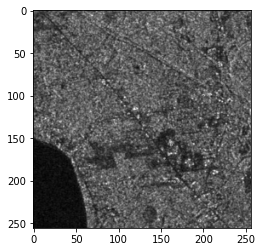

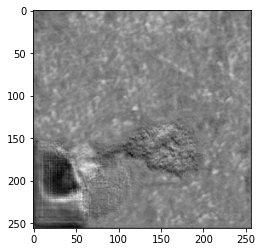

In [ ]:
plt.imshow(image[0][0].detach().numpy(), cmap='gray')
plt.show()
plt.imshow(img_out[0][0].detach().numpy(), cmap='gray')

In [ ]:
 model_test = model_test.double().cuda()

In [ ]:
for param in model_test.parameters():
  param.required_grad = True

In [ ]:
optimizer = optim.Adam(model_test.parameters(), lr=0.00001)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, 20, eta_min=0, last_epoch=-1)

In [ ]:
model_tr_trained = train_SAR(30, trainloaderSAR, validloaderSAR, model_test, optimizer, criterion, use_cuda, 'gdrive/My Drive/Checkpoints_UNet/checkpoint_SAR_transfer_p00001_valid.pt')

2020-10-16 04:48:58.221702
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 1e-05

Epoch: 1 	Training Loss: 0.104822 
Valid loss decreased (inf --> 0.097003).  Saving model ...
2020-10-16 04:51:03.028036
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 9.938441702975689e-06

Epoch: 2 	Training Loss: 0.099000 
2020-10-16 04:53:07.593900
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 9.755282581475769e-06

Epoch: 3 	Training Loss: 0.101855 
2020-10-16 04:55:11.5

KeyboardInterrupt: ignored

In [ ]:
print(5)